# SBA National Loan Analysis

# Modeling - Part 3 - XGBoosting Classifier

## 1. Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, matthews_corrcoef, confusion_matrix

from library.preprocessing import processing_pipeline
from library.modeling import (createModel, createClassificationMetrics,
                             runGridSearchAnalysis, createConfusionMatrix, createFeatureImportanceChart)

## 2. Previewing Data

In [2]:
sba_loans = pd.read_csv('./../data/processed/sba_national_processed_final.csv')

pd.set_option('display.max_columns', None)

In [3]:
sba_loans.head()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,GrAppv,SBA_Appv,NAICS_sectors,unemployment_rate,gdp_growth,gdp_annual_change,inflation_rate,inf_rate_annual_chg,NewExist_existing_business,NewExist_new_business,UrbanRural_rural,UrbanRural_urban,isFranchise_not_franchise,RevLineCr_v2_N,RevLineCr_v2_Y,LowDoc_v2_N,LowDoc_v2_Y,MIS_Status_v2_default,state_top10
0,84,4,0,0,60000.0,60000.0,48000.0,45,3.5,4.4472,0.67,2.3377,-0.59,0,1,0,0,1,1,0,0,1,0,0
1,60,2,0,0,40000.0,40000.0,32000.0,72,3.5,4.4472,0.67,2.3377,-0.59,0,1,0,0,1,1,0,0,1,0,0
2,180,7,0,0,287000.0,287000.0,215250.0,62,3.5,4.4472,0.67,2.3377,-0.59,1,0,0,0,1,1,0,1,0,0,0
3,60,2,0,0,35000.0,35000.0,28000.0,0,4.1,4.4472,0.67,2.3377,-0.59,1,0,0,0,1,1,0,0,1,0,0
4,240,14,7,7,229000.0,229000.0,229000.0,0,4.8,4.4472,0.67,2.3377,-0.59,1,0,0,0,1,1,0,1,0,0,1


In [4]:
target = 'MIS_Status_v2_default'
features = sba_loans.drop(columns='MIS_Status_v2_default', axis=1).columns

## 3. XGBoosting Classifier with Standard Scalar

In [5]:
X_train_ss, X_test_ss, y_train_ss, y_test_ss = processing_pipeline(sba_loans, target)

### A. Simple  XGBoosting Model

In [6]:
xgb_ss_mod1 = XGBClassifier(random_state=42, verbosity=0)
y_pred = createModel(xgb_ss_mod1, X_train_ss, y_train_ss, X_test_ss)

### B. Evaluation Metrics

In [7]:
acc_score, cr, f1, mcc = createClassificationMetrics(y_pred, y_test_ss)

**Accuracy Score**

In [8]:
print(acc_score)

0.948321393767621


**Classification Report**

In [9]:
print(cr)

              precision    recall  f1-score   support

        paid       0.97      0.96      0.97    223925
     default       0.83      0.87      0.85     44929

    accuracy                           0.95    268854
   macro avg       0.90      0.92      0.91    268854
weighted avg       0.95      0.95      0.95    268854



**F1 Score**

In [10]:
print(f1)

0.8488665535395729


**Matthew's Correlation Coefficient**

In [11]:
print(mcc)

0.8180204436227226


### C. Finding Best  XGBoosting Model with Standard Scaler

In [13]:
param_grid = {
    'learning_rate': [0.1, 1],
    'n_estimators': [50, 100],
    'max_depth': [3, 10]
}

In [14]:
xgbc = XGBClassifier(random_state=42, verbosity=0)
xgbc_ss_best_params, y_pred = runGridSearchAnalysis(xgbc, param_grid, X_train_ss, y_train_ss, X_test_ss)

In [15]:
print(xgbc_ss_best_params)

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}


In [16]:
acc_score, cr, f1, mcc = createClassificationMetrics(y_pred, y_test_ss)
print('Accuracy Score: {}'.format(acc_score))
print('Matthew\'s Correlation Coefficient: {}'.format(mcc))
print('F1 Score: {}'.format(f1))
print('Classification Report: \n{}'.format(cr))

Accuracy Score: 0.9493702901946781
Matthew's Correlation Coefficient: 0.8216896937293268
F1 Score: 0.8518921506756905
Classification Report: 
              precision    recall  f1-score   support

        paid       0.97      0.96      0.97    223951
     default       0.83      0.87      0.85     44903

    accuracy                           0.95    268854
   macro avg       0.90      0.92      0.91    268854
weighted avg       0.95      0.95      0.95    268854



### D. Confusion Matrix

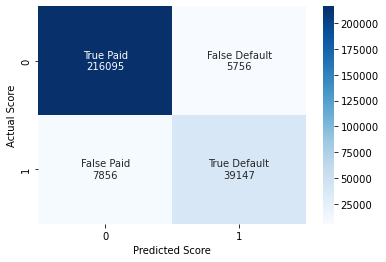

In [17]:
xgbc_ss_fp = createConfusionMatrix(y_test_ss, y_pred)

### E. Feature Importance with Best Params

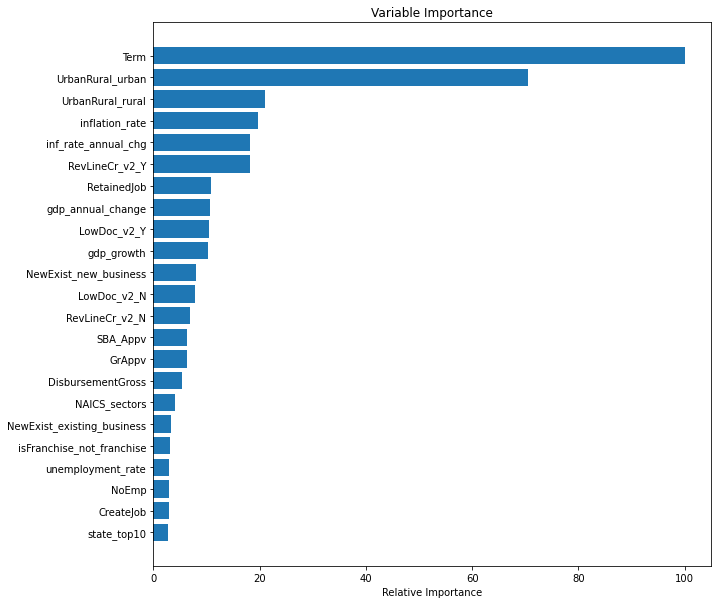

In [18]:
createFeatureImportanceChart(XGBClassifier, xgbc_ss_best_params, features, X_train_ss, y_train_ss)

## 4. XGBoosting Classification with Robust Scaler

In [19]:
X_train_rs, X_test_rs, y_train_rs, y_test_rs = processing_pipeline(sba_loans, target, scaler='Robust')

### A. Simple Gradient Boosting Model

In [20]:
xgbc_rs_mod1 = XGBClassifier(random_state=42, verbosity=0)
y_pred = createModel(xgbc_rs_mod1, X_train_rs, y_train_rs, X_test_rs)

### B. Evaluation Metrics

In [21]:
acc_score, cr, f1, mcc = createClassificationMetrics(y_pred, y_test_rs)

**Accuracy Score**

In [22]:
print(acc_score)

0.948321393767621


**Classification Report**

In [23]:
print(cr)

              precision    recall  f1-score   support

        paid       0.97      0.96      0.97    223925
     default       0.83      0.87      0.85     44929

    accuracy                           0.95    268854
   macro avg       0.90      0.92      0.91    268854
weighted avg       0.95      0.95      0.95    268854



**F1 Score**

In [24]:
print(f1)

0.8488665535395729


**Matthew's Correlation Coefficient**

In [25]:
print(mcc)

0.8180204436227226


### C. Finding Best Gradient Boosting Model with Robust Scaler

In [26]:
param_grid = {
    'learning_rate': [0.1, 1],
    'n_estimators': [50, 100],
    'max_depth': [3, 10]
}

In [27]:
xgbc = XGBClassifier(random_state=42)
xgbc_rs_best_params, y_pred = runGridSearchAnalysis(xgbc, param_grid, X_train_rs, y_train_rs, X_test_rs)

In [28]:
print(xgbc_rs_best_params)

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}


In [29]:
acc_score, cr, f1, mcc = createClassificationMetrics(y_pred, y_test_rs)
print('Accuracy Score: {}'.format(acc_score))
print('Matthew\'s Correlation Coefficient: {}'.format(mcc))
print('F1 Score: {}'.format(f1))
print('Classification Report: \n{}'.format(cr))

Accuracy Score: 0.9493814486673064
Matthew's Correlation Coefficient: 0.8217278540829649
F1 Score: 0.8519231815461618
Classification Report: 
              precision    recall  f1-score   support

        paid       0.97      0.96      0.97    223952
     default       0.83      0.87      0.85     44902

    accuracy                           0.95    268854
   macro avg       0.90      0.92      0.91    268854
weighted avg       0.95      0.95      0.95    268854



### D. Confusion Matrix

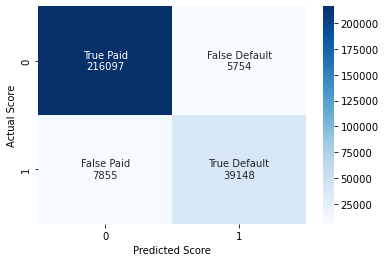

In [30]:
xgbc_rs_fp = createConfusionMatrix(y_test_rs, y_pred)

### E. Feature Importance with Best Params

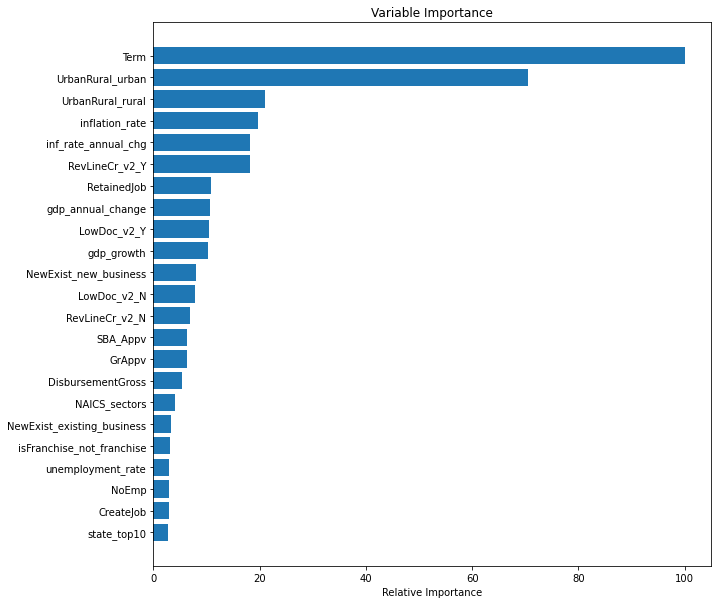

In [31]:
createFeatureImportanceChart(XGBClassifier, xgbc_rs_best_params, features, X_train_rs, y_train_rs)

## 5. Best Gradient Boosting Model

In [32]:
if xgbc_ss_fp > xgbc_rs_fp:
    print('Best Logistic Regression Model Params: {}'.format(xgbc_rs_best_params))
    print('Best Scaler: Robust Scaler')
else:
    print('Best Logistic Regression Model Params: {}'.format(xgbc_ss_best_params))
    print('Best Scaler: Standard Scaler')

Best Logistic Regression Model Params: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Best Scaler: Robust Scaler
